# Question 12: What are the top 5 most frequently occurring hours in the log?”

# Section 1: Data Preparation and Preprocessing

**IMPORTING NECESSARY LIBRARIES**

In [1]:
#https://spark.apache.org/docs/latest/api/python/getting_started/quickstart_df.html
# Importinng 'SparkSession' module which is the main entry point for DataFrame and SQL functionality. SparkSession can be used create DataFrame, register DataFrame as tables, execute SQL over tables and cache tables.
from pyspark.sql import SparkSession

# Importing 'Date (datetime.date)', 'Timestamp (datetime.datetime)' , 'Double' data type from 'Data Types' module  
from pyspark.sql.types import DateType, TimestampType, DoubleType

# importing built-in functions available for DataFrame.
from pyspark.sql.functions import to_date, to_timestamp, col, month

# Importing 'matplotlib.pyplot' module for creating and customizing plots and visualizations. 
# 'pyplot' is a part of the Matplotlib library and provides a user-friendly interface to create different types of plots.
# https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
import matplotlib.pyplot as plt

# Importing'time' module for measuring execution time
# https://docs.python.org/3/library/time.html
import time

**EXECUTION TIME COUNTER START**

In [2]:
# Recording the starting time of the execution using the 'time.perf_counter()' function.It provides a high-resolution timer that measures the time elapsed in seconds to measure its execution time.
executiontimestart= time.perf_counter()

In [3]:
# Initializing SparkSession named 'ScpProject' using the SparkSession builder.
session = SparkSession.builder.appName('ScpProject').getOrCreate()

23/08/11 21:28:38 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [4]:
# Reading data from CSV file into a DataFrame 'bgl_log_df'
bgl_log_df = session.read.csv("BGLnew.log", sep=',', inferSchema=True, header=False)

In [5]:
# Renaming the columns 'toDF()' method for better understanding into our dataframe.
bgl_log_df = bgl_log_df.toDF('alert_message_flag', 'timestamp', 'date', 'node', 'date_and_time', 'node_repeated',
                             'message_type', 'system_component', 'level', 'message_content')


In [6]:
# Parsing 'date' column to standard DateType
bgl_log_df = bgl_log_df.withColumn('date', to_date('date', 'yyyy.MM.dd'))

In [7]:
# Parsing 'date_and_time' column to standard TimestampType
bgl_log_df = bgl_log_df.withColumn('date_and_time', to_timestamp('date_and_time', 'yyyy-MM-dd-HH.mm.ss.SSSSSS'))

In [8]:
# Casting columns to appropriate data types
bgl_log_df = bgl_log_df.withColumn("timestamp", bgl_log_df["timestamp"].cast(TimestampType())) \
    .withColumn("date", bgl_log_df["date"].cast(DateType())) \
    .withColumn("date_and_time", bgl_log_df["date_and_time"].cast(TimestampType()))

In [9]:
# Using 'printSchema()' method to display the updated schema of the DataFrame 'bgl_log_df'.
bgl_log_df.printSchema()

root
 |-- alert_message_flag: string (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- date: date (nullable = true)
 |-- node: string (nullable = true)
 |-- date_and_time: timestamp (nullable = true)
 |-- node_repeated: string (nullable = true)
 |-- message_type: string (nullable = true)
 |-- system_component: string (nullable = true)
 |-- level: string (nullable = true)
 |-- message_content: string (nullable = true)



**DATA PREPRATION AND PREPROCESSING COMPLETED**

In [10]:
# We are using the 'show()' method to display the DataFrame 'bgl_log_df' in a vertical format.
# The 'vertical=True' argument is used to display the DataFrame vertically, showing each row in a single line.
# The 'truncate=False' argument is used to prevent truncation of column values, ensuring complete visibility of the data.
bgl_log_df.show(truncate=False, vertical=True)

-RECORD 0------------------------------------------------------
 alert_message_flag | -                                        
 timestamp          | 2005-06-03 22:42:50                      
 date               | 2005-06-03                               
 node               | R02-M1-N0-C:J12-U11                      
 date_and_time      | 2005-06-03 15:42:50.363779               
 node_repeated      | R02-M1-N0-C:J12-U11                      
 message_type       | RAS                                      
 system_component   | KERNEL                                   
 level              | INFO                                     
 message_content    | instruction cache parity error corrected 
-RECORD 1------------------------------------------------------
 alert_message_flag | -                                        
 timestamp          | 2005-06-03 22:42:50                      
 date               | 2005-06-03                               
 node               | R02-M1-N0-C:J12-U1

# Section 2: Log Data Analysis : Spark SQL

**TOTAL NUMBER OF LOG ENTRIES IN THE LOG DATASET COUNT**

In [11]:
# Count total logs in the DataFrame
total_logs_count = bgl_log_df.count()

# Display the total number of logs
total_logs_count

4747963

**CREATING TEMPORARY VIEW OF THE DATAFRAME**

In [12]:
# Using the 'createOrReplaceTempView()' method to create a temporary view of the DataFrame 'bgl_log_df'.
# This temporary view, named "bgllogtable," allows us to perform SQL queries and leverage the power of SQL to interact with the DataFrame and perform complex data analysis and transformations.
# NOTE: The temporary view exists for the duration of the SparkSession and can be queried using Spark SQL syntax.
bgl_log_df.createOrReplaceTempView("bgllogtable")

<span style="color:blue">**SQL Query for Question 12: Top 5 Most Frequent Occurring Hours**</SPAN>

***1. SELECT HOUR(date_and_time) AS hour_HH, COUNT(*) AS Occurance_Count***
   - We are selecting the 'hour' part from the 'date_and_time' column using the 'HOUR()' function and aliasing it as 'hour_HH'.
   - The 'COUNT()' function is used to calculate the number of occurrences for each hour and is aliased as 'Occurance_Count'.

***2. FROM bgllogtable***
   - We are selecting data from the 'bgllogtable' where the log entries are stored.

***3. GROUP BY HOUR(date_and_time)***
   - We are grouping the log entries by the 'hour' part of the 'date_and_time' column.
   - This helps in counting the occurrences of log entries for each hour.

***4. ORDER BY Occurance_Count DESC***
   - We are arranging the result in descending order based on the 'Occurance_Count'.
   - This will ensure that the most frequent hours appear at the top.

<span style="color:blue">**The output of this SQL query will provide the top 5 hours and their corresponding occurrence counts, which can be used for further analysis and visualization to gain insights into the log entry patterns.**<span style="color:blue">

In [13]:
SQL_question12="""
SELECT HOUR(date_and_time) AS hour_HH, COUNT(*) AS Occurance_Count
FROM bgllogtable
GROUP BY HOUR(date_and_time)
ORDER BY Occurance_Count DESC;
"""

<span style="color:blue">***THE TOP 5 MOST FREQUENTLY OCCURING HOURS IN THE LOG***<span style="color:blue">

In [14]:
# Using the 'session' object to execute an SQL query and display the results.
sql_result_df=session.sql(SQL_question12)
sql_result_df.show(5)

+-------+---------------+
|hour_HH|Occurance_Count|
+-------+---------------+
|     11|         388648|
|     10|         379141|
|     12|         354389|
|      8|         315017|
|      9|         308801|
+-------+---------------+
only showing top 5 rows



In [15]:
#converting the Spark DataFrame to a Pandas DataFrame for plotting
pandas_df = sql_result_df.toPandas()

# Section 3: Visualization

<span style="color:blue">***VISUALISING THE TOP 5 MOST FREQUENTLY OCCURING HOURS IN THE LOG***</span> MARKED IN <span style="color:red">RED</span>

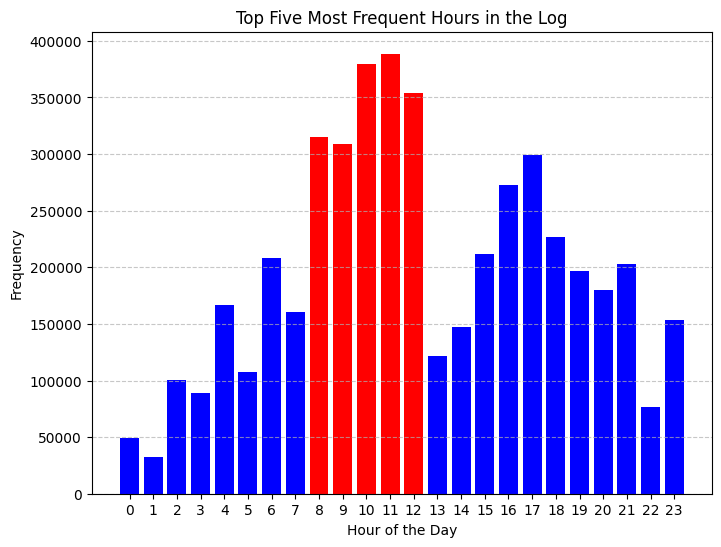

In [16]:
# https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(pandas_df["hour_HH"], pandas_df["Occurance_Count"], color="blue")

# Highlight the top five occurrences in red
top_five = pandas_df.iloc[:5]
plt.bar(top_five["hour_HH"], top_five["Occurance_Count"], color="red")

# Add labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Frequency")
plt.title("Top Five Most Frequent Hours in the Log")
plt.xticks(pandas_df['hour_HH'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [17]:
# Measuring end of execution time. 
#https://docs.python.org/3/library/time.html
#returns the value (in fractional seconds) of a performance counter.It does include time elapsed during sleep and is system-wide.
executiontimeend= time.perf_counter()

In [18]:
# Calculating the total execution time by subtracting the start time from the end time.
# Calculating the total execution time as  time.perf_counter() returns the absolute value of the counter
# https://stackoverflow.com/questions/25785243/understanding-time-perf-counter-and-time-process-time
totalexecution_time= executiontimeend - executiontimestart
totalexecution_time

9.194009243990877

In [19]:
# all the information on the 'spark runtime environment', executors sumamry, jobs and its stages can be found on 'Spark UI'
spark